<a href="https://colab.research.google.com/github/jsgf04/TdR_Physics_behind_skiing/blob/main/grafiquesmovimentrectiliniambventafegit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Gràfiques del moviment rectilini amb velocitat del vent afegida**



Variables que et demanarà:


*   Massa de l'esquiador (kg)
*   Velocitat del vent (m/s) * 
*   Coeficient de fricció cinètica
*   Coeficient de fricció estàtica
*   Angle de la pista (º): 
*   Temps final o durada del trajecte (s)
*   Velocitat inicial de l'esquiador (m/s), és a dir, si s'impulsa amb els pals o no.

*Si és 0, el cas es simplifica a l'aire essent estàtic i, per tant, al cas del simulador de Geogebra.

---
Normes per al correcte funcionament del simulador:

-Nombres decimals amb '  .  ' , no amb '  ,  '  .

**Correcte :** 12.7

**Incorrecte :** 12,7


---
Per iniciar la simulació cliqueu el botó de "play" al racó superior esquerre del codi o bé feu la combinació de botons 

```
Ctrl+Enter
```




Massa de l'esquiador (kg): 80
Velocitat del vent (m/s): 12.5
Coeficient de fricció cinètica: 0.02
Coeficient de fricció estàtica: 0.04
Inclinació de la pista (º): 20
Temps final (s): 20
Velocitat inicial (m/s): 0



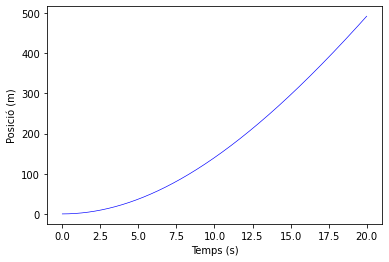

x = 491.8737831993243 m
t = 20.0 s


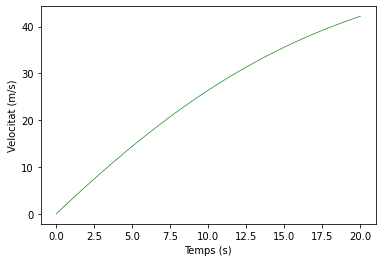

v = 42.2120651607017 m/s
t = 20.0 s


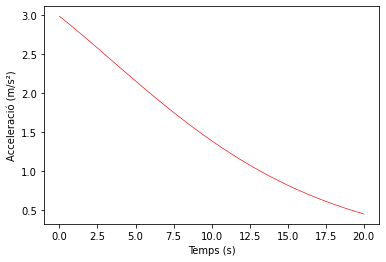

a = 0.452... m/s²
t = 20.0 s


In [2]:
import numpy as np
from numpy import sin,cos,sign,sqrt
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt

g = 9.807
m = float(input("Massa de l'esquiador (kg): "))
w = float(input("Velocitat del vent (m/s): "))
mu_kinetic = float(input("Coeficient de fricció cinètica: "))
mu_static = float(input("Coeficient de fricció estàtica: "))
k = (0.43 * 0.255 * 1.01178) / 2
alpha_degrees = float(input("Inclinació de la pista (º): "))
alpha_rad = np.radians(alpha_degrees)

def equations(t,y):
    dy=np.zeros([3])
    # 0 Pos
    # 1 Vel
    # 2 Acc
    dy[0] = y[1]
    dy[1] = y0[2]
    dy[1] = g*np.sin(alpha_rad)-mu_kinetic*g*np.cos(alpha_rad)-(k/m)*(y[1]+w)**2
    dy[2] = -((2*k*y[2])/m)*(2*y[1] + w*y[2])
    

    return dy

final_time = float(input("Temps final (s): "))
time = np.linspace(0, final_time, 100000)
initial_velocity = float(input("Velocitat inicial (m/s): "))
initial_acc = g*np.sin(alpha_rad)-mu_static*g*np.cos(alpha_rad)
y0 = [0.0, initial_velocity, initial_acc]
print("")
#Solució
y = solve_ivp(equations, (0,final_time), y0, method='RK45', t_eval=time, dense_output=True, rtol=1e-12, atol=1e-24)

t, pos, vel, acc = y.t, y.y[0], y.y[1], y.y[2]

expr= 'm/s\N{SUPERSCRIPT TWO}'

plt.plot(t, pos.T,"b",linewidth = 0.65)
plt.xlabel("Temps (s)")
plt.ylabel("Posició (m)")
plt.show()
print("x = "+str(pos[-1])+" m")
print("t = "+str(final_time)+" s")

plt.plot(t, vel.T,"g",linewidth = 0.65)
plt.xlabel("Temps (s)")
plt.ylabel("Velocitat (m/s)")
plt.show()
print("v = "+str(vel[-1])+" m/s")
print("t = "+str(final_time)+" s")

plt.plot(t, acc.T,"r",linewidth = 0.65)
plt.xlabel("Temps (s)")
plt.ylabel("Acceleració ("+expr+")")
plt.show()
print("a = "+str(round(acc[-1], 3))+"... " +expr)
print("t = "+str(final_time)+" s")